<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Data investigation

data = load_breast_cancer()
print(type(data),data.keys())

<class 'sklearn.utils.Bunch'> dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# Checking dimensions of data
print(data.data.shape, data.target.shape)

(569, 30) (569,)


In [4]:
# Creating A and b variables

A = data.data
b = data.target

In [5]:
# Creating train test split
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,stratify=b)

In [6]:
# Feature Scaling

scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [7]:
# Constructing model
cmodel = tf.keras.models.Sequential()

cmodel.add(tf.keras.layers.Dense(1, input_shape=(A_train.shape[1],), activation='sigmoid'))

cmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Fitting model
clf = cmodel.fit(A_train,b_train, validation_data=(A_test,b_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 38ms/step - loss: 0.5437 - accuracy: 0.7682 - val_loss: 0.5808 - val_accuracy: 0.7632
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5295 - accuracy: 0.7928 - val_loss: 0.5300 - val_accuracy: 0.7895
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4532 - accuracy: 0.8174 - val_loss: 0.4865 - val_accuracy: 0.8070
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4049 - accuracy: 0.8344 - val_loss: 0.4494 - val_accuracy: 0.8333
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4536 - accuracy: 0.8112 - val_loss: 0.4170 - val_accuracy: 0.8421
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3715 - accuracy: 0.8377 - val_loss: 0.3905 - val_accuracy: 0.8509
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3452 - accuracy: 0.8738 - val_loss: 0.3671 - val_accuracy: 0.8596
Epoch 8/100


In [8]:
# Evaluating model

print('Train Loss & Accuracy:', cmodel.evaluate(A_train,b_train))
print('Test Loss & Accuracy:', cmodel.evaluate(A_test,b_test))

15/15 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9802
Train Loss & Accuracy: [0.07988934218883514, 0.9802197813987732]
4/4 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9649
Test Loss & Accuracy: [0.09898998588323593, 0.9649122953414917]


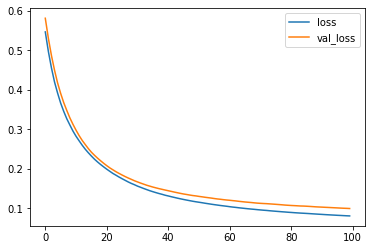

In [9]:
# Plotting model performance

plt.plot(clf.history['loss'], label='loss')
plt.plot(clf.history['val_loss'], label='val_loss')
plt.legend()

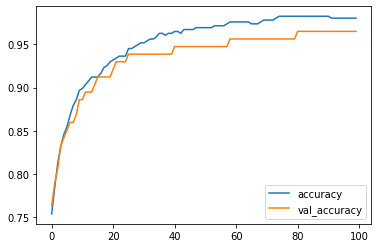

In [10]:
# Plotting model performance

plt.plot(clf.history['accuracy'], label='accuracy')
plt.plot(clf.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [12]:
# Making a Prediction

prediction = cmodel.predict(A_test)
prediction

array([[6.2894356e-01],
       [9.9827373e-01],
       [9.9977332e-01],
       [1.0571543e-01],
       [9.9521208e-01],
       [9.8445618e-01],
       [9.8625141e-01],
       [9.9428964e-01],
       [9.9815911e-01],
       [4.3446125e-04],
       [7.0842111e-01],
       [9.9978238e-01],
       [9.9280083e-01],
       [1.5262056e-04],
       [9.9984789e-01],
       [9.8720294e-01],
       [9.7564346e-01],
       [9.7214085e-01],
       [5.8290404e-01],
       [1.2789426e-03],
       [3.6774784e-01],
       [9.9109143e-01],
       [2.9161205e-05],
       [9.9172133e-01],
       [9.9957031e-01],
       [9.9744898e-01],
       [9.8725629e-01],
       [9.8762894e-01],
       [5.5578101e-04],
       [7.2483178e-03],
       [3.5828992e-04],
       [9.9281234e-01],
       [9.9807990e-01],
       [4.1808134e-01],
       [4.1885691e-05],
       [3.2047689e-01],
       [9.9321258e-01],
       [9.7690636e-01],
       [2.2930337e-02],
       [9.4673651e-01],
       [9.1981632e-01],
       [9.889097

In [27]:
# Rounding predicted values & evaluating model preformace

ypred = np.round(prediction).flatten()
print(f"Classification Model Perfomance:\nLoss: {cmodel.evaluate(A_test,b_test)[0]}\nAccuracy: {round(cmodel.evaluate(A_test,b_test)[1]*100,2)}%")

4/4 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9649
Classification Model Perfomance:
Loss: 0.09898998588323593
Accuracy: 96.49%
